In [1]:
# Exercise 7-9

In [2]:
rm(list=ls())
library(ISLR)
library(MASS)
library(boot)
library(splines)
# Data
attach(Boston)
fix(Boston)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


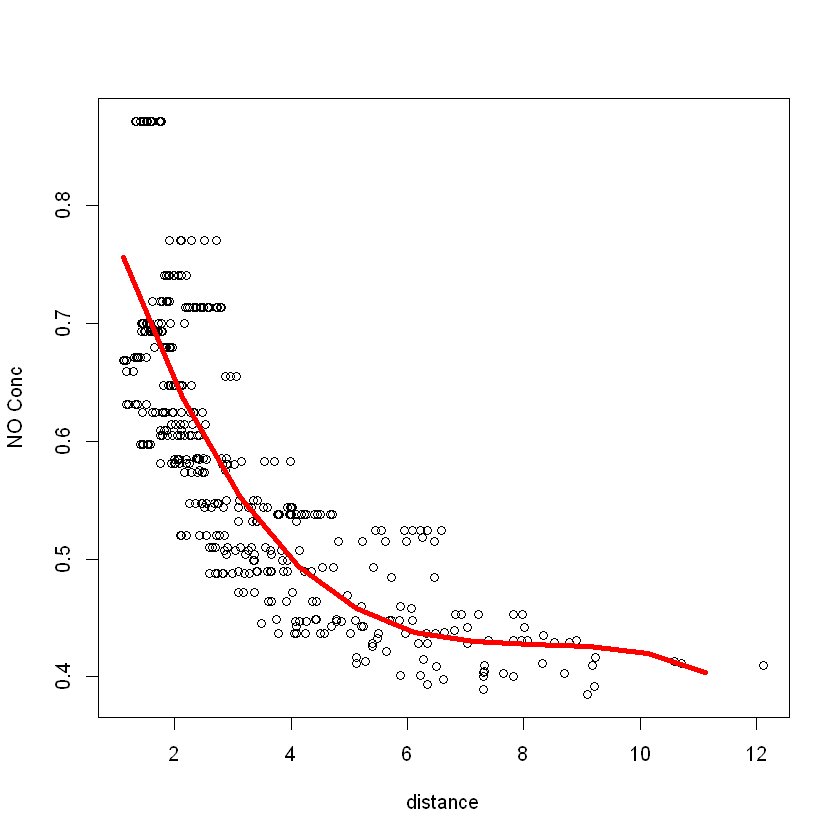

In [3]:
# Part a: Cubic poly fit
m1 <- lm(nox~poly(dis,3), data=Boston)
# Reg output:
summary(m1)
# PLot resulting data and poly fit:
dis.range <- range(dis)
dis.grid <- seq(from=dis.range[1], to=dis.range[2])
dis.pred <- predict(m1, newdata=data.frame(dis=dis.grid))
plot(Boston$dis, Boston$nox, xlab="distance", ylab="NO Conc")
lines(dis.grid, dis.pred, lwd=4, col="red")

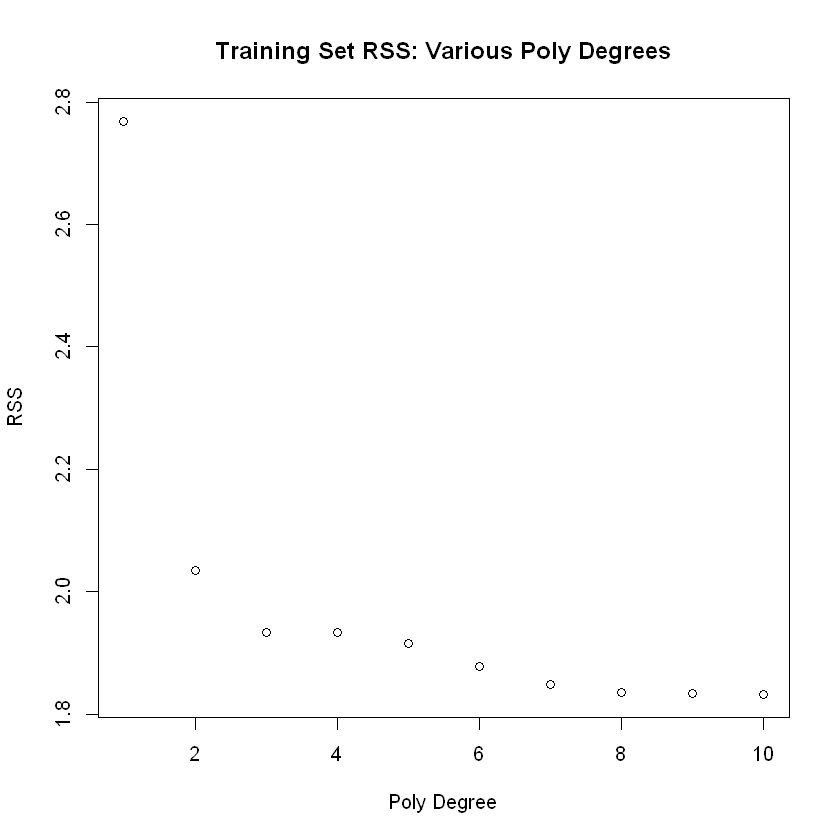

In [4]:
# Part b.  Here I plot the poly fits for poly degrees 1:10, and then I report the associated RSS.
deg_max <- 10

# Create a matrix to store the fitted polynomials to plot:
dis.range <- range(Boston$dis)
dis.grid <- seq(from=dis.range[1], to=dis.range[2])
fitted_mat <- matrix(0, nrow=deg_max, ncol=length(dis.grid))
# Create a matrix to store the values of RSS:
rss_mat <- matrix(0, nrow=deg_max, ncol=1)
# Loop thru: 
for (i in 1:deg_max)
{
    # Train model:
    model <- lm(nox~poly(dis,i), data=Boston)
    # Save RSS into matrix:
    rss_mat[i,1] <- sum(model$residuals^2)
    # Create and save the fitted vals:
    fitted_mat[i,] <- predict(model, newdata=data.frame(dis=dis.grid))
}
# Plot RSS vs. degree of poly:
plot(1:deg_max, rss_mat[1:deg_max,1], xlab="Poly Degree", ylab="RSS", main="Training Set RSS: Various Poly Degrees")
# As expected, since the methods fitted were not regularized in any way, not surprisingly train RSS decreases
# monotonically as poly degree increases.

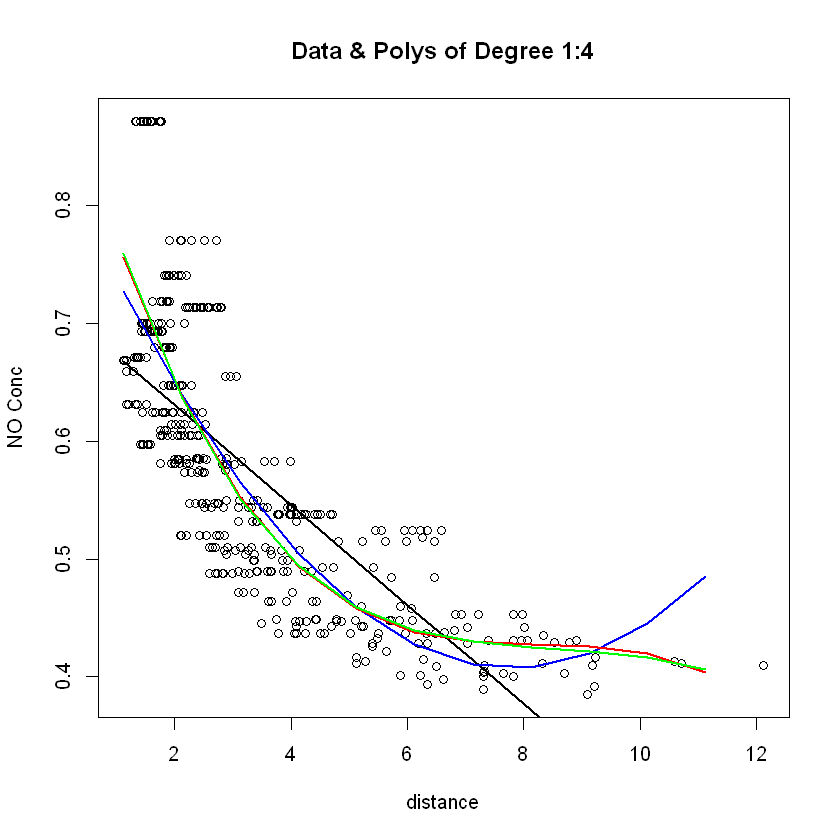

In [5]:
# For ease of viewing, plot the first c(4,3,3) in the (top, middle, bottom) graphs, respectively.
plot(Boston$dis, Boston$nox, xlab="distance", ylab="NO Conc", main="Data & Polys of Degree 1:4")
lines(dis.grid, fitted_mat[1,], lwd=2, col="black")
lines(dis.grid, fitted_mat[2,], lwd=2, col="blue")
lines(dis.grid, fitted_mat[3,], lwd=2, col="red")
lines(dis.grid, fitted_mat[4,], lwd=2, col="green")

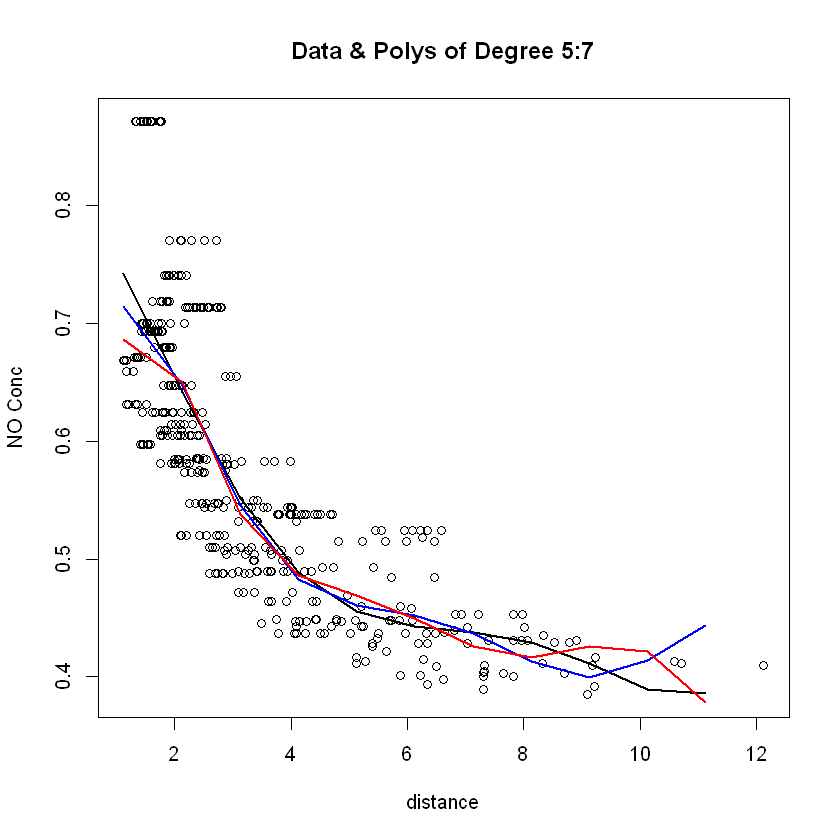

In [6]:
# For ease of viewing, plot the first c(4,3,3) in the (top, middle, bottom) graphs, respectively.
plot(Boston$dis, Boston$nox, xlab="distance", ylab="NO Conc", main="Data & Polys of Degree 5:7")
lines(dis.grid, fitted_mat[5,], lwd=2, col="black")
lines(dis.grid, fitted_mat[6,], lwd=2, col="blue")
lines(dis.grid, fitted_mat[7,], lwd=2, col="red")

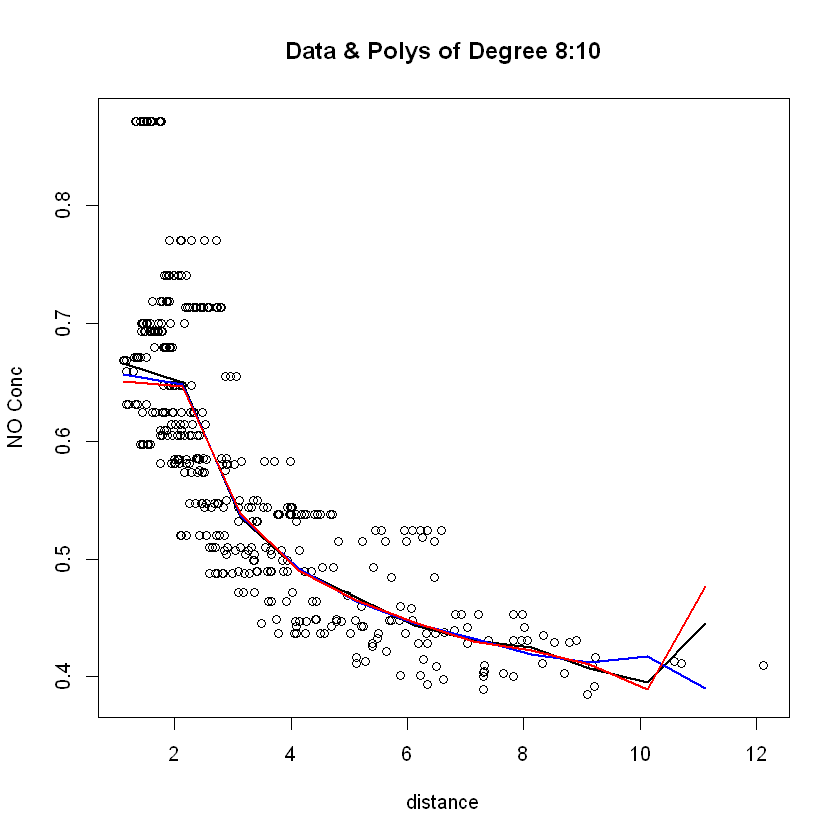

In [7]:
# For ease of viewing, plot the first c(4,3,3) in the (top, middle, bottom) graphs, respectively.
plot(Boston$dis, Boston$nox, xlab="distance", ylab="NO Conc", main="Data & Polys of Degree 8:10")
lines(dis.grid, fitted_mat[8,], lwd=2, col="black")
lines(dis.grid, fitted_mat[9,], lwd=2, col="blue")
lines(dis.grid, fitted_mat[10,], lwd=2, col="red")

[1] 3


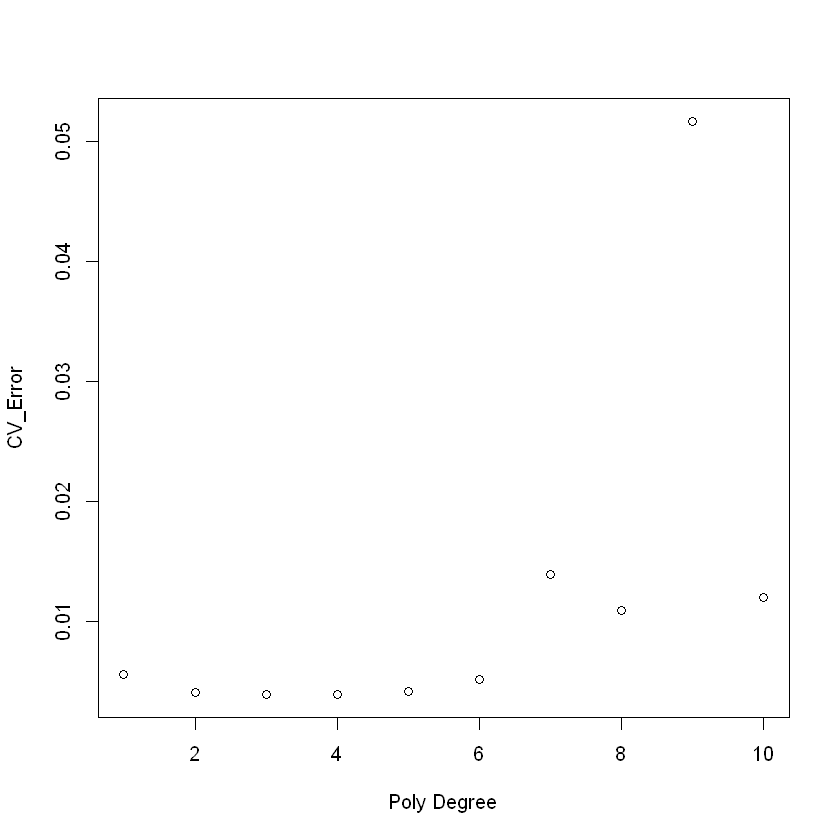

In [8]:
# Part c: Perform CV to select optimal degree of polynomial:
cv_storage <- matrix(0, nrow=deg_max, ncol=1)
for (k in 1:deg_max)
{
    # Create a fitted GLM object, then CV:
    glm.fit <- glm(nox~poly(dis,k), data=Boston)
    cv_storage[k,1] <- cv.glm(data=Boston, glmfit=glm.fit, K=10)$delta[1]
}
plot(1:deg_max, cv_storage[1:deg_max,1], xlab="Poly Degree", ylab="CV_Error")
print(which.min(cv_storage[1:deg_max,1]))
# As the below plot and above which.min() function, I select the 3rd degree polynomial fit since it has the
# lowest CV error.  I note that the 2nd, 4th, and 5th degree polynomials have similar CV-errors.  While the 4th and
# 5th would probably be worse choices b/c they use additional parms, the 2nd degree poly would also be a good choice
# since it uses 1 fewer parm but has similar performance.  Nonetheless, here I select the 3rd degree fit.
# The below plot shows the familiar U(-ish) shaped plot: using a 1st or 2nd degree poly is stable but has too much bias,
# while 4+ degree fits have less bias but too much variance.  3rd degree poly hits the best of both worlds.
# In particular, clearly the 9th and 10th degree polynomials really are where performance becomes terrible 
# presumably because of gross overfitting there.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.130   2.100   3.207   3.795   5.188  12.127 


Call:
lm(formula = nox ~ bs(dis, knots = c(mean(dis))), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121447 -0.039151 -0.008509  0.022865  0.194861 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     0.74731    0.01303  57.355  < 2e-16 ***
bs(dis, knots = c(mean(dis)))1 -0.10495    0.02176  -4.824 1.87e-06 ***
bs(dis, knots = c(mean(dis)))2 -0.44461    0.02355 -18.881  < 2e-16 ***
bs(dis, knots = c(mean(dis)))3 -0.24086    0.04217  -5.712 1.92e-08 ***
bs(dis, knots = c(mean(dis)))4 -0.38931    0.04626  -8.416 4.12e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0621 on 501 degrees of freedom
Multiple R-squared:  0.7151,	Adjusted R-squared:  0.7128 
F-statistic: 314.4 on 4 and 501 DF,  p-value: < 2.2e-16


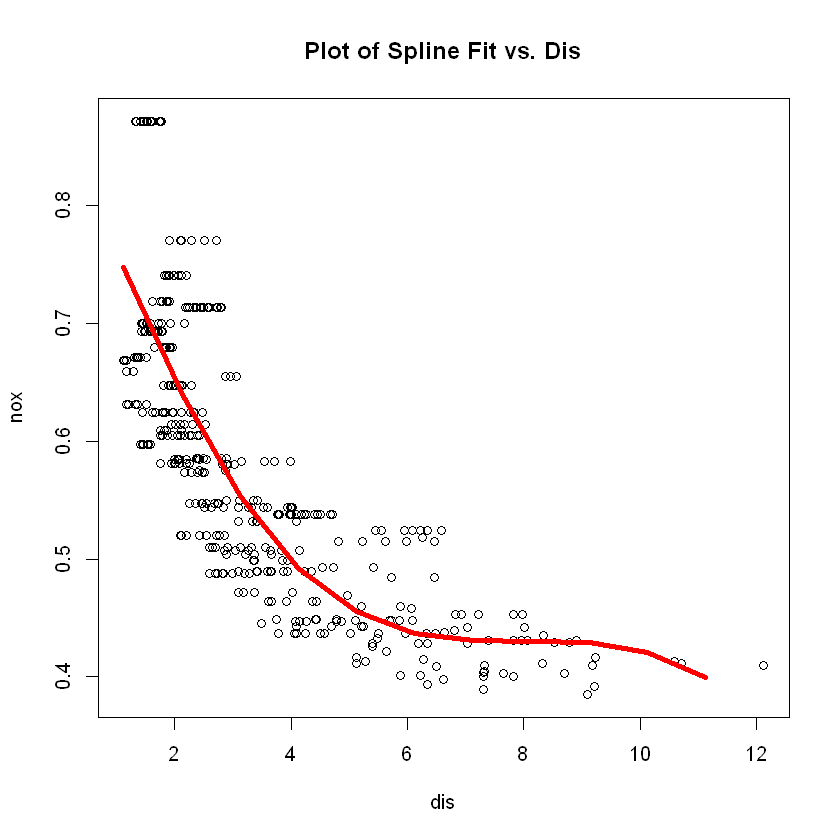

In [10]:
# Part d: Here I use the bs() function to fit a reg spline to predict nox using dis.  
# The question asks me to report on the fit using 4 dof.  
# Using 1 knot would result in 6 dof in bs (assuming no intercepts inside bs) + 1 dof in lm's interecept - 3 dof
# because of continuity and 1st 2 deriv constraints = 4 dof total in fit.
# I choose the placement for the 1 knot as the mean of dis (about 3.795), as is commonly done:
summary(dis)

# Fit:
spl_fit <- lm(nox~bs(dis, knots=c(mean(dis))), data=Boston)

# Report the output of the fit:
summary(spl_fit)
# Plot the resulting fit:
dis.range <- range(dis)
dis.grid <- seq(from=dis.range[1], to=dis.range[2])
spl_preds <- predict(spl_fit, newdata=data.frame(dis=dis.grid))
plot(dis, nox, main="Plot of Spline Fit vs. Dis")
lines(dis.grid, spl_preds, col="red", lwd=4)

In [10]:
# Part e: Proceeding as above, I use the bs() function to fit regression splines for c(4,5,6) dof, which correspond to 
# c(1,2,3) knots (per above derivation).
# Define dof to loop thru:
dof_storage <- c(4,5,6)
# Set up matrix to hold the RSS values
spl_rss_mat <- matrix(0, nrow=length(dof_storage), ncol=1)
# Create variables to define the grid of dis:
dis.range <- range(dis)
dis.grid <- seq(from=dis.range[1], to=dis.range[2])
# Create a matrix to store the predicted values:
spl_fitted_mat <- matrix(0, nrow=length(dof_storage), ncol=length(dis.grid))

# Loop:
for (l in 1:length(dof_storage))
{
    temp_fit <- lm(nox~bs(dis, degree=3, df=dof_storage[l]), data=Boston)
    # Record RSS:
    spl_rss_mat[l,1] <- sum(temp_fit$residuals^2)
    # Generate predicted values for later plot:
    # Plot the resulting fit:
    spl_fitted_mat[l,] <- predict(temp_fit, newdata=data.frame(dis=dis.grid))
}
print(spl_rss_mat)
# As expected, increasing the dof (and thus number of fitted parms) decreases the RSS on the training data.

         [,1]
[1,] 1.922775
[2,] 1.840173
[3,] 1.833966


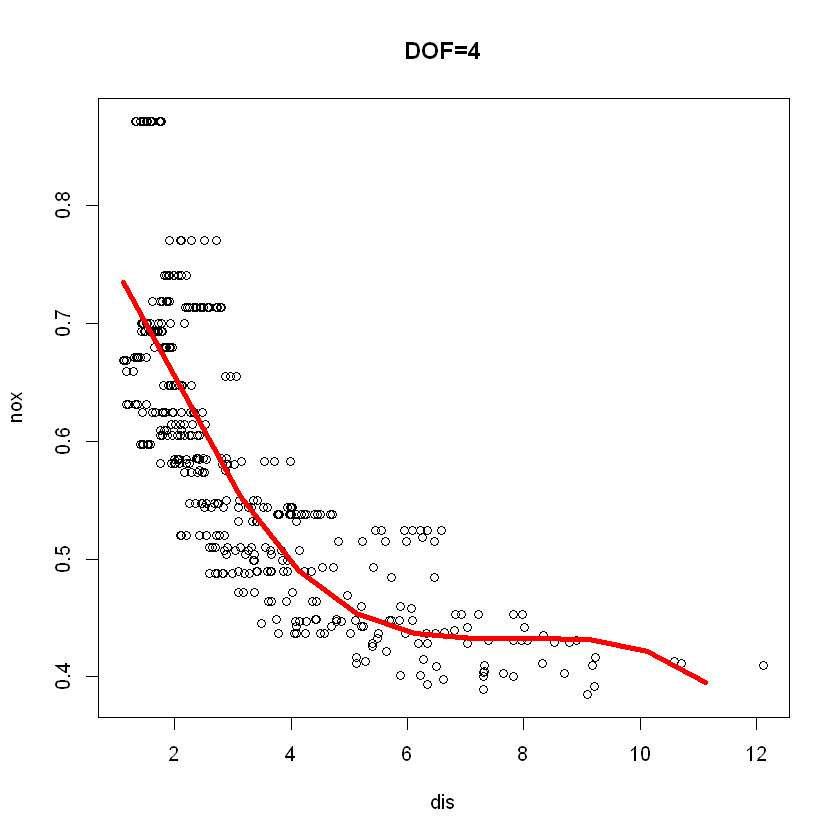

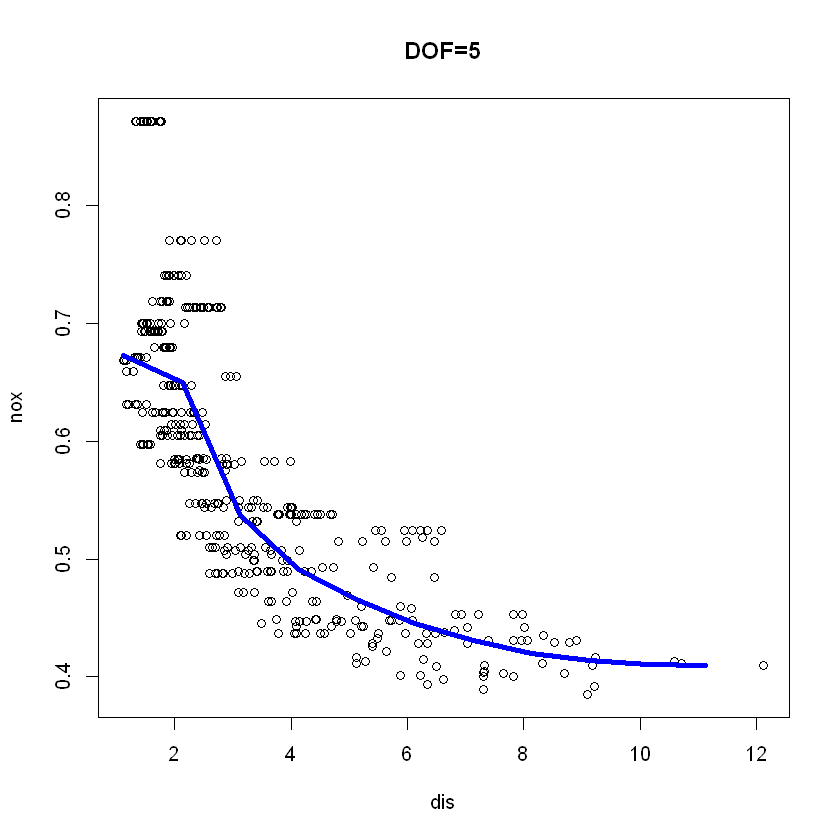

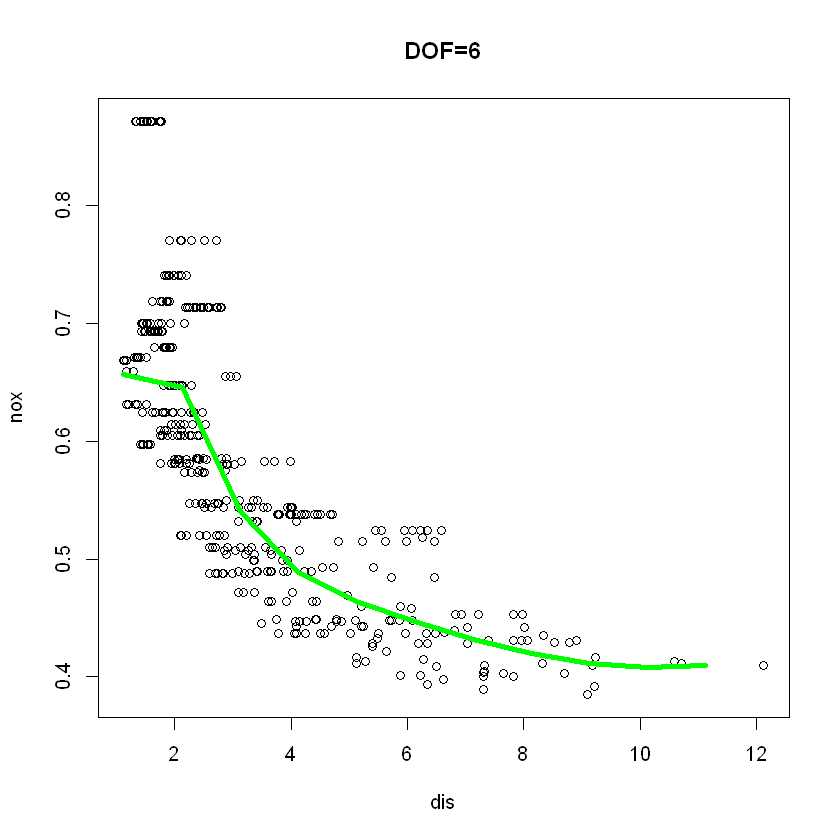

In [15]:
# Plot the resulting fits:
dis.range <- range(dis)
dis.grid <- seq(from=dis.range[1], to=dis.range[2])
# DOF = 4
plot(dis, nox, main="DOF=4")
lines(dis.grid, spl_fitted_mat[1,], col="red", lwd=4)
# DOF = 5
plot(dis, nox, main="DOF=5")
lines(dis.grid, spl_fitted_mat[2,], col="blue", lwd=4)
# DOF = 6
plot(dis, nox, main="DOF=6")
lines(dis.grid, spl_fitted_mat[3,], col="green", lwd=4)

In [22]:
# Part f: Here I perform CV to select the best dof:
spl_cv_storage <- rep(0, 3)

# Perform CV on the other two candidates:
set.seed(1)
for (k in 1:3)
{
    # Create a fitted GLM object, then CV:
    glm.fit <- glm(nox~bs(dis, degree=3, df=dof_storage[k]), data=Boston)
    spl_cv_storage[k] <- cv.glm(data=Boston, glmfit=glm.fit, K=10)$delta[1]
}
print(spl_cv_storage)

Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.1523), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.1523), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.1992), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.1992), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = c(`33.33333%` = 2.38876666666667, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in bs(dis, degree = 3L, knots = c(`33.33333%` = 2.38876666666667, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"
Warning message in

[1] 0.003874210 0.003716933 0.003743481


In [21]:
# While the software does throw warnings about the ill-conditioned nature of the problem, at least the CV 
# error results make sense: indicating that dof = 5 is optimal among the candidates I have considered.  Perhaps
# using ns() natural splines instead of bs() regression splines may help this, as the natural splines 
# will have better behavior around the boundaries?